In [793]:

import os
import csv
import math as m
import numpy as np
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt


In [794]:

# STARTING VARIABLES
# orbits(years) -> revolutions(days) -> arcs(hours)
ORBITS_PER_SIMULATION   = 0 # years
REVOLUTIONS_PER_ORBIT   = 0 # days
ARCS_PER_REVOLUTION     = 0 # hours

# daily data points
X_revolutions       = list()
revolution_count    = 0
X_arcs              = list()
arc_count           = 0


In [795]:

class Me:

    # globals
    m2e = 0

    # current personal values
    energy  = 2000 # roughly equivalent to a traditional dietary calorie
    cash    = 2000

    # internal cash/energy level record
    energy_level    = list()
    cash_level      = list()


    # snapshot records
    earnings      = list()
    expenses      = list()
    consumption   = list()
    expenditure   = list()
    production    = list()

    # cumulative tally
    cum_earnings    = 0
    cum_expenses    = 0
    cum_consumption = 0
    cum_expenditure = 0
    cum_production  = 0

    # aggregated records
    agg_earnings    = list()
    agg_expenses    = list()
    agg_consumption = list()
    agg_expenditure = list()
    agg_production  = list()

    # supplementary records
    consumption_vs_expenditure  = list()
    production_vs_expenditure   = list()
    production_vs_consumption   = list()

    consumption_vs_expenses  = list()
    production_vs_earnings   = list()
    agg_consumption_vs_expenses  = list()
    agg_production_vs_earnings   = list()

    # internal variables
    hunger_level_stabilizer = 1200
    base_wage = 1200

    def take_turn(self, m2e):

        self.m2e = m2e
        self.energy_level.append(self.energy)
        self.cash_level.append(self.cash)

        earned      = 0
        spent       = 0
        consumed    = 0
        expended    = 0 # not really necessary since both conditional options return it
        produced    = 0

        self.hunger_level_stabilizer = np.random.randint(500, self.hunger_level_stabilizer+1)

        if self.energy <= self.hunger_level_stabilizer:
            self.hunger_level_stabilizer = 1200 # reset hunger stabilizer
            spent, expended, consumed = self.buy_and_consume_meal() # get a meal

        else: # work & earn money
            variations_in_hard_labor = np.random.randint(25,125)
            expended, produced, earned = self.mine(variations_in_hard_labor)

        # snapshot records ------------------------------------------------------------------------
        self.earnings.append(earned)
        self.expenses.append(spent)
        self.consumption.append(consumed)
        self.expenditure.append(expended)
        self.production.append(produced)

        # add to cumulative tallies and append to aggregate records -------------------------------
        self.cum_earnings       += earned
        self.cum_expenses       += spent
        self.cum_consumption    += consumed
        self.cum_expenditure    += expended
        self.cum_production     += produced

        self.agg_earnings.append(self.cum_earnings)
        self.agg_expenses.append(self.cum_expenses)
        self.agg_consumption.append(self.cum_consumption)
        self.agg_expenditure.append(self.cum_expenditure)
        self.agg_production.append(self.cum_production)

        # calculate additional metrics and append to supplementary records ------------------------
        consumed_vs_expended = abs(consumed - expended)
        produced_vs_expended = produced - expended
        produced_vs_consumed = produced - consumed

        self.consumption_vs_expenditure.append(consumed_vs_expended)
        self.production_vs_expenditure.append(produced_vs_expended)
        self.production_vs_consumption.append(produced_vs_consumed)

        consumed_vs_spent = consumed // spent if spent > 0 else 0 # how much did the agent pay for his energy?
        produced_to_earned = produced // earned if earned > 0 else 0 # how much did the agent's boss pay the agent for energy?
        cum_consumed_vs_spent = self.cum_consumption // self.cum_expenses if self.cum_expenses > 0 else 0
        cum_produced_to_earned = self.cum_production // self.cum_earnings if self.cum_earnings > 0 else 0

        self.consumption_vs_expenses.append(consumed_vs_spent)
        self.production_vs_earnings.append(produced_to_earned)
        self.agg_consumption_vs_expenses.append(cum_consumed_vs_spent)
        self.agg_production_vs_earnings.append(cum_produced_to_earned)

    def buy_and_consume_meal(self):
        deficiency = 2000 - self.energy #calculate energy deficiency
        spent = self.buy(deficiency)
        expended, consumed = self.consume(deficiency)
        return spent, expended, consumed

    def buy(self, deficit):
        meal_cost = int(deficit * self.m2e) # how much the meal is
        self.cash -= meal_cost # pay for meal
        return meal_cost # report

    def consume(self, deficit):
        meal_energy = deficit
        energy_for_consumption = meal_energy//50 # additional energy necessary for consumption & digestion
        consumption_expenditure = self.expend(energy_for_consumption)
        self.energy += meal_energy # re-charge
        return consumption_expenditure, meal_energy # report

    def expend(self, labor=0):
        expended = 80 + labor # how much was burned
        self.energy -= expended # take it out of energy store
        return expended # report

    def mine(self, labor):
        expended = self.expend(labor)
        # Mining logic / energy units mined per hr.
        # 169 lb of boneless lean meat for a 339 lb cow
        # @975 cal per lb => 1 kill = 164,775 cal
        # if it takes 24 hr. to hunt and kill:
        # ~6,866 cal produced per hour
        e_mined = np.random.randint(1000,10000)
        commission = int(e_mined * 0.1) if e_mined > 7000 else 0
        calc_wage = self.base_wage + commission
        earned = self.earn(calc_wage)
        return expended, e_mined, earned

    def earn(self, amt):
        self.cash += amt
        return amt


In [796]:
# create directory to save graph and compile the relevant data
class PrepDirectories:

    title       = ''
    resolution  = ''
    pdf_path    = ''
    csv_path    = ''

    def __init__(self, m2e):


        self.m2e_path = os.path.join(os.getcwd(), f'@M2E_{m2e}')
        if not os.path.exists(self.m2e_path):
            os.mkdir(self.m2e_path)

        self.pdf_path = os.path.join(self.m2e_path, 'PDFs')
        if not os.path.exists(self.pdf_path):
            os.mkdir(self.pdf_path)

        self.csv_path = os.path.join(self.m2e_path, 'CSVs')
        if not os.path.exists(self.csv_path):
            os.mkdir(self.csv_path)

    def generate_save_directories(self, title, resolution):
        self.title      = title
        self.resolution = resolution
        return self.generate_pdf_path(), self.generate_csv_path()

    def generate_pdf_path(self):
        file_path = f'{self.pdf_path}/{self.title} [{self.resolution}].pdf'
        return file_path

    def generate_csv_path(self):
        file_path = f'{self.csv_path}/{self.title} [{self.resolution}].csv'
        return file_path


In [797]:
def game_loop(m2e_iteration):
    # STARTING VARIABLES
    # orbits(years) -> revolutions(days) -> arcs(hours)
    ORBITS_PER_SIMULATION   = 10 # years
    REVOLUTIONS_PER_ORBIT   = 365 # days
    ARCS_PER_REVOLUTION     = 24 # hours

    # money to energy multiplier
    # let's keep it equal (for now); make it easier to detect anomalies
    # m2e = 6 # this is the lowest value before things are untenable
    m2e = m2e_iteration

    # daily data points
    X_revolutions       = list()
    revolution_count    = 0
    X_arcs              = list()
    arc_count           = 0

    # GAME LOOP
    me = Me()

    for standard_orbit in range(ORBITS_PER_SIMULATION):

        for standard_revolution in range(REVOLUTIONS_PER_ORBIT):

            # this is actually kinda cool - it colors in areas :P
            # X_revolutions.append(int(str(standard_orbit)+str(standard_revolution)))
            X_revolutions.append(revolution_count)

            for standard_arc in range(ARCS_PER_REVOLUTION):

                arc_count += 1
                X_arcs.append(arc_count)
                me.take_turn(m2e)

            revolution_count += 1

    pdir = PrepDirectories(m2e)

    graph_01(me, pdir)


In [798]:
def graph_01(me, pdir):
    #######################################################################################
    # Fundamental Metrics FIRST 48
    #######################################################################################
    fig_title = 'Five Fundamental Metrics'
    fig_resolution = 'arcs' # revolutions OR arcs
    fig_a, ax_a = plt.subplots()
    ax_a.set_title(f'{fig_title} [{fig_resolution}]')
    ax_a.set_xlabel('Arcs (hours)')
    ax_a.set_ylabel('Superimposed Monetary & Energetic Values')

    st = None #start
    sp = 48 #stop
    sk = None #skip

    ax_a.plot(X_arcs[st:sp:sk], me.earnings[st:sp:sk], label='Earnings')
    ax_a.plot(X_arcs[st:sp:sk], me.expenses[st:sp:sk], label='Expenses')
    ax_a.plot(X_arcs[st:sp:sk], me.consumption[st:sp:sk], label='Consumption')
    ax_a.plot(X_arcs[st:sp:sk], me.expenditure[st:sp:sk], label='Expenditure')
    ax_a.plot(X_arcs[st:sp:sk], me.production[st:sp:sk], label='Production')
    ax_a.legend()

    pdf_path, csv_path = pdir.generate_save_directories(fig_title, f'{sp} {fig_resolution}')
    fig_a.savefig(pdf_path)

    csv_headers = X_arcs[st:sp:sk]
    csv_values = [
        me.earnings[st:sp:sk],
        me.expenses[st:sp:sk],
        me.consumption[st:sp:sk],
        me.expenditure[st:sp:sk],
        me.production[st:sp:sk]
    ]

    with open(csv_path, 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(csv_headers)
        writer.writerows(csv_values)


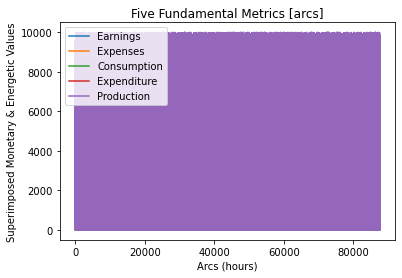

In [771]:

    #######################################################################################
    # Fundamental Metrics
    #######################################################################################
    fig_title = 'Five Fundamental Metrics'
    fig_resolution = 'arcs' # revolutions OR arcs
    fig_a, ax_a = plt.subplots()
    ax_a.set_title(f'{fig_title} [{fig_resolution}]')
    ax_a.set_xlabel('Arcs (hours)')
    ax_a.set_ylabel('Superimposed Monetary & Energetic Values')

    st = None #start
    sp = None #stop
    sk = None #skip


    ax_a.plot(X_arcs[st:sp:sk],
              me.earnings[st:sp:sk],
              label='Earnings')

    ax_a.plot(X_arcs[st:sp:sk],
              me.expenses[st:sp:sk],
              label='Expenses')

    ax_a.plot(X_arcs[st:sp:sk],
              me.consumption[st:sp:sk],
              label='Consumption')

    ax_a.plot(X_arcs[st:sp:sk],
              me.expenditure[st:sp:sk],
              label='Expenditure')

    ax_a.plot(X_arcs[st:sp:sk],
              me.production[st:sp:sk],
              label='Production')


    ax_a.legend()


    pdf_path, csv_path = pdir.generate_save_directories(fig_title, f'{sp} {fig_resolution}')
    fig_a.savefig(pdf_path)

    csv_headers = X_arcs[st:sp:sk]
    csv_values = [
        me.earnings[st:sp:sk],
        me.expenses[st:sp:sk],
        me.consumption[st:sp:sk],
        me.expenditure[st:sp:sk],
        me.production[st:sp:sk]
    ]

    with open(csv_path, 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(csv_headers)
        writer.writerows(csv_values)


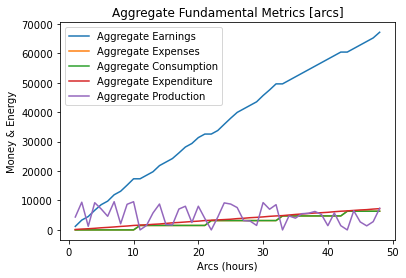

In [772]:

    #######################################################################################
    # Aggregate Fundamental Metrics FIRST 48
    #######################################################################################
    fig_title = 'Aggregate Fundamental Metrics'
    fig_resolution = 'arcs' # revolutions OR arcs
    fig_a, ax_a = plt.subplots()
    ax_a.set_title(f'{fig_title} [{fig_resolution}]')
    ax_a.set_xlabel('Arcs (hours)')
    ax_a.set_ylabel('Money & Energy')

    st = None #start
    sp = 48 #stop
    sk = None #skip


    ax_a.plot(X_arcs[st:sp:sk],
              me.agg_earnings[st:sp:sk],
              label='Aggregate Earnings')

    ax_a.plot(X_arcs[st:sp:sk],
              me.agg_expenses[st:sp:sk],
              label='Aggregate Expenses')

    ax_a.plot(X_arcs[st:sp:sk],
              me.agg_consumption[st:sp:sk],
              label='Aggregate Consumption')

    ax_a.plot(X_arcs[st:sp:sk],
              me.agg_expenditure[st:sp:sk],
              label='Aggregate Expenditure')

    ax_a.plot(X_arcs[st:sp:sk],
              me.production[st:sp:sk],
              label='Aggregate Production')


    ax_a.legend()


    pdf_path, csv_path = pdir.generate_save_directories(fig_title, f'{sp} {fig_resolution}')
    fig_a.savefig(pdf_path)

    csv_headers = X_arcs[st:sp:sk]

    csv_values = [
        me.agg_earnings[st:sp:sk],
        me.agg_expenses[st:sp:sk],
        me.agg_consumption[st:sp:sk],
        me.agg_expenditure[st:sp:sk],
        me.agg_production[st:sp:sk],
    ]
    with open(csv_path, 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(csv_headers)
        writer.writerows(csv_values)


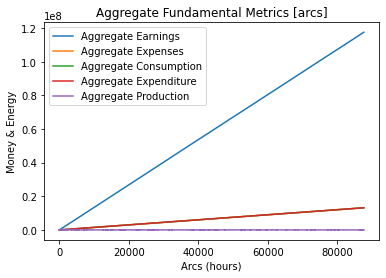

In [773]:

    #######################################################################################
    # Aggregate Fundamental Metrics
    #######################################################################################
    fig_title = 'Aggregate Fundamental Metrics'
    fig_resolution = 'arcs' # revolutions OR arcs
    fig_a, ax_a = plt.subplots()
    ax_a.set_title(f'{fig_title} [{fig_resolution}]')
    ax_a.set_xlabel('Arcs (hours)')
    ax_a.set_ylabel('Money & Energy')

    st = None #start
    sp = None #stop
    sk = None #skip


    ax_a.plot(X_arcs[st:sp:sk],
              me.agg_earnings[st:sp:sk],
              label='Aggregate Earnings')

    ax_a.plot(X_arcs[st:sp:sk],
              me.agg_expenses[st:sp:sk],
              label='Aggregate Expenses')

    ax_a.plot(X_arcs[st:sp:sk],
              me.agg_consumption[st:sp:sk],
              label='Aggregate Consumption')

    ax_a.plot(X_arcs[st:sp:sk],
              me.agg_expenditure[st:sp:sk],
              label='Aggregate Expenditure')

    ax_a.plot(X_arcs[st:sp:sk],
              me.production[st:sp:sk],
              label='Aggregate Production')


    ax_a.legend()


    pdf_path, csv_path = pdir.generate_save_directories(fig_title, f'{sp} {fig_resolution}')
    fig_a.savefig(pdf_path)

    csv_headers = X_arcs[st:sp:sk]

    csv_values = [
        me.agg_earnings[st:sp:sk],
        me.agg_expenses[st:sp:sk],
        me.agg_consumption[st:sp:sk],
        me.agg_expenditure[st:sp:sk],
        me.agg_production[st:sp:sk],
    ]
    with open(csv_path, 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(csv_headers)
        writer.writerows(csv_values)


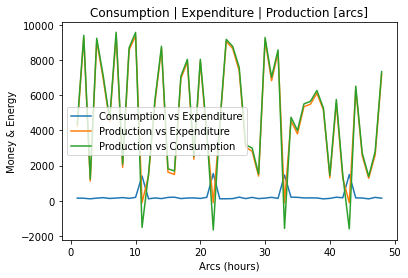

In [774]:

    #######################################################################################
    # Consumption | Expenditure | Production FIRST 48
    #######################################################################################
    fig_title = 'Consumption | Expenditure | Production'
    fig_resolution = 'arcs' # revolutions OR arcs
    fig_a, ax_a = plt.subplots()
    ax_a.set_title(f'{fig_title} [{fig_resolution}]')
    ax_a.set_xlabel('Arcs (hours)')
    ax_a.set_ylabel('Money & Energy')

    st = None #start
    sp = 48 #stop
    sk = None #skip


    ax_a.plot(X_arcs[st:sp:sk],
              me.consumption_vs_expenditure[st:sp:sk],
              label='Consumption vs Expenditure')

    ax_a.plot(X_arcs[st:sp:sk],
              me.production_vs_expenditure[st:sp:sk],
              label='Production vs Expenditure')

    ax_a.plot(X_arcs[st:sp:sk],
              me.production_vs_consumption[st:sp:sk],
              label='Production vs Consumption')


    ax_a.legend()


    pdf_path, csv_path = pdir.generate_save_directories(fig_title, f'{sp} {fig_resolution}')
    fig_a.savefig(pdf_path)

    csv_headers = X_arcs[st:sp:sk]

    csv_values = [
        me.consumption_vs_expenditure[st:sp:sk],
        me.production_vs_expenditure[st:sp:sk],
        me.production_vs_consumption[st:sp:sk]
    ]
    with open(csv_path, 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(csv_headers)
        writer.writerows(csv_values)


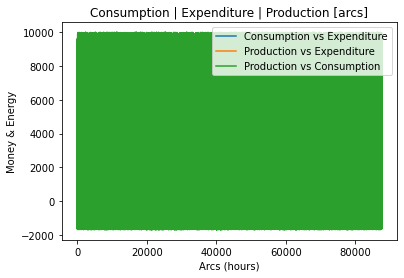

In [775]:

    #######################################################################################
    # Consumption | Expenditure | Production FIRST 48
    #######################################################################################
    fig_title = 'Consumption | Expenditure | Production'
    fig_resolution = 'arcs' # revolutions OR arcs
    fig_a, ax_a = plt.subplots()
    ax_a.set_title(f'{fig_title} [{fig_resolution}]')
    ax_a.set_xlabel('Arcs (hours)')
    ax_a.set_ylabel('Money & Energy')

    st = None #start
    sp = None #stop
    sk = None #skip


    ax_a.plot(X_arcs[st:sp:sk],
              me.consumption_vs_expenditure[st:sp:sk],
              label='Consumption vs Expenditure')

    ax_a.plot(X_arcs[st:sp:sk],
              me.production_vs_expenditure[st:sp:sk],
              label='Production vs Expenditure')

    ax_a.plot(X_arcs[st:sp:sk],
              me.production_vs_consumption[st:sp:sk],
              label='Production vs Consumption')


    ax_a.legend()


    pdf_path, csv_path = pdir.generate_save_directories(fig_title, f'{sp} {fig_resolution}')
    fig_a.savefig(pdf_path)

    csv_headers = X_arcs[st:sp:sk]

    csv_values = [
        me.consumption_vs_expenditure[st:sp:sk],
        me.production_vs_expenditure[st:sp:sk],
        me.production_vs_consumption[st:sp:sk]
    ]
    with open(csv_path, 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(csv_headers)
        writer.writerows(csv_values)


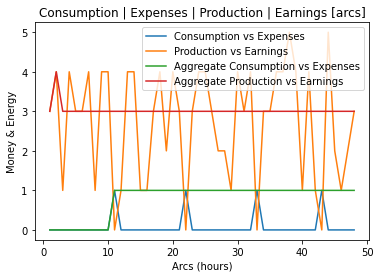

In [776]:

    #######################################################################################
    # Consumption | Expenses | Production | Earnings FIRST 48
    #######################################################################################
    fig_title = 'Consumption | Expenses | Production | Earnings'
    fig_resolution = 'arcs' # revolutions OR arcs
    fig_a, ax_a = plt.subplots()
    ax_a.set_title(f'{fig_title} [{fig_resolution}]')
    ax_a.set_xlabel('Arcs (hours)')
    ax_a.set_ylabel('Money & Energy')

    st = None #start
    sp = 48 #stop
    sk = None #skip


    ax_a.plot(X_arcs[st:sp:sk],
              me.consumption_vs_expenses[st:sp:sk],
              label='Consumption vs Expenses')

    ax_a.plot(X_arcs[st:sp:sk],
              me.production_vs_earnings[st:sp:sk],
              label='Production vs Earnings')

    ax_a.plot(X_arcs[st:sp:sk],
              me.agg_consumption_vs_expenses[st:sp:sk],
              label='Aggregate Consumption vs Expenses')

    ax_a.plot(X_arcs[st:sp:sk],
              me.agg_production_vs_earnings[st:sp:sk],
              label='Aggregate Production vs Earnings')


    ax_a.legend()


    pdf_path, csv_path = pdir.generate_save_directories(fig_title, fig_resolution)
    fig_a.savefig(pdf_path)

    csv_headers = X_arcs[st:sp:sk]

    csv_values = [
        me.consumption_vs_expenses[st:sp:sk],
        me.production_vs_earnings[st:sp:sk],
        me.agg_consumption_vs_expenses[st:sp:sk],
        me.agg_production_vs_earnings[st:sp:sk]
    ]
    with open(csv_path, 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(csv_headers)
        writer.writerows(csv_values)


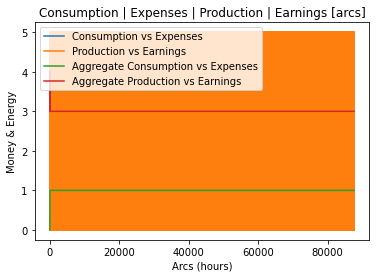

In [777]:

    #######################################################################################
    # Consumption | Expenses | Production | Earnings
    #######################################################################################
    fig_title = 'Consumption | Expenses | Production | Earnings'
    fig_resolution = 'arcs' # revolutions OR arcs
    fig_a, ax_a = plt.subplots()
    ax_a.set_title(f'{fig_title} [{fig_resolution}]')
    ax_a.set_xlabel('Arcs (hours)')
    ax_a.set_ylabel('Money & Energy')

    st = None #start
    sp = None #stop
    sk = None #skip


    ax_a.plot(X_arcs[st:sp:sk],
              me.consumption_vs_expenses[st:sp:sk],
              label='Consumption vs Expenses')

    ax_a.plot(X_arcs[st:sp:sk],
              me.production_vs_earnings[st:sp:sk],
              label='Production vs Earnings')

    ax_a.plot(X_arcs[st:sp:sk],
              me.agg_consumption_vs_expenses[st:sp:sk],
              label='Aggregate Consumption vs Expenses')

    ax_a.plot(X_arcs[st:sp:sk],
              me.agg_production_vs_earnings[st:sp:sk],
              label='Aggregate Production vs Earnings')


    ax_a.legend()


    pdf_path, csv_path = pdir.generate_save_directories(fig_title, fig_resolution)
    fig_a.savefig(pdf_path)

    csv_headers = X_arcs[st:sp:sk]

    csv_values = [
        me.consumption_vs_expenses[st:sp:sk],
        me.production_vs_earnings[st:sp:sk],
        me.agg_consumption_vs_expenses[st:sp:sk],
        me.agg_production_vs_earnings[st:sp:sk]
    ]
    with open(csv_path, 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(csv_headers)
        writer.writerows(csv_values)


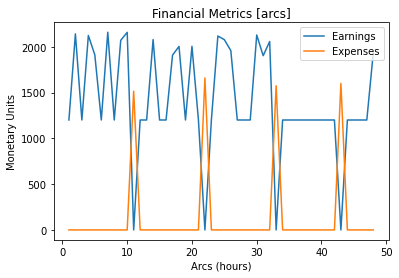

In [778]:

    #######################################################################################
    # Financial Metrics FIRST 48
    #######################################################################################
    fig_title = 'Financial Metrics'
    fig_resolution = 'arcs' # revolutions OR arcs
    fig_a, ax_a = plt.subplots()
    ax_a.set_title(f'{fig_title} [{fig_resolution}]')
    ax_a.set_xlabel('Arcs (hours)')
    ax_a.set_ylabel('Monetary Units')

    st = None #start
    sp = 48 #stop
    sk = None #skip


    ax_a.plot(X_arcs[st:sp:sk],
              me.earnings[st:sp:sk],
              label='Earnings')

    ax_a.plot(X_arcs[st:sp:sk],
              me.expenses[st:sp:sk],
              label='Expenses')


    ax_a.legend()


    pdf_path, csv_path = pdir.generate_save_directories(fig_title, f'{sp} {fig_resolution}')
    fig_a.savefig(pdf_path)

    csv_headers = X_arcs[st:sp:sk]
    csv_values = [
        me.earnings[st:sp:sk],
        me.expenses[st:sp:sk]
    ]

    with open(csv_path, 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(csv_headers)
        writer.writerows(csv_values)


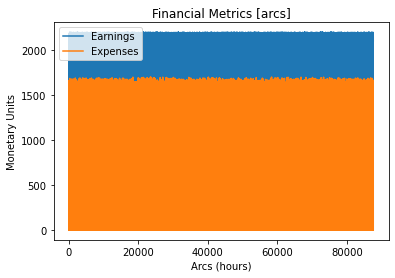

In [779]:

    #######################################################################################
    # Financial Metrics
    #######################################################################################
    fig_title = 'Financial Metrics'
    fig_resolution = 'arcs' # revolutions OR arcs
    fig_a, ax_a = plt.subplots()
    ax_a.set_title(f'{fig_title} [{fig_resolution}]')
    ax_a.set_xlabel('Arcs (hours)')
    ax_a.set_ylabel('Monetary Units')

    st = None #start
    sp = None #stop
    sk = None #skip


    ax_a.plot(X_arcs[st:sp:sk],
              me.earnings[st:sp:sk],
              label='Earnings')

    ax_a.plot(X_arcs[st:sp:sk],
              me.expenses[st:sp:sk],
              label='Expenses')


    ax_a.legend()


    pdf_path, csv_path = pdir.generate_save_directories(fig_title, f'{sp} {fig_resolution}')
    fig_a.savefig(pdf_path)

    csv_headers = X_arcs[st:sp:sk]
    csv_values = [
        me.earnings[st:sp:sk],
        me.expenses[st:sp:sk]
    ]

    with open(csv_path, 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(csv_headers)
        writer.writerows(csv_values)


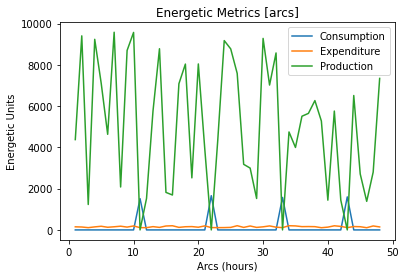

In [780]:

    #######################################################################################
    # Energetic Metrics FIRST 48
    #######################################################################################
    fig_title = 'Energetic Metrics'
    fig_resolution = 'arcs' # revolutions OR arcs
    fig_a, ax_a = plt.subplots()
    ax_a.set_title(f'{fig_title} [{fig_resolution}]')
    ax_a.set_xlabel('Arcs (hours)')
    ax_a.set_ylabel('Energetic Units')

    st = None #start
    sp = 48 #stop
    sk = None #skip


    ax_a.plot(X_arcs[st:sp:sk],
              me.consumption[st:sp:sk],
              label='Consumption')

    ax_a.plot(X_arcs[st:sp:sk],
              me.expenditure[st:sp:sk],
              label='Expenditure')

    ax_a.plot(X_arcs[st:sp:sk],
              me.production[st:sp:sk],
              label='Production')


    ax_a.legend()


    pdf_path, csv_path = pdir.generate_save_directories(fig_title, f'{sp} {fig_resolution}')
    fig_a.savefig(pdf_path)

    csv_headers = X_arcs[st:sp:sk]
    csv_values = [
        me.consumption[st:sp:sk],
        me.expenditure[st:sp:sk],
        me.production[st:sp:sk]
    ]

    with open(csv_path, 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(csv_headers)
        writer.writerows(csv_values)


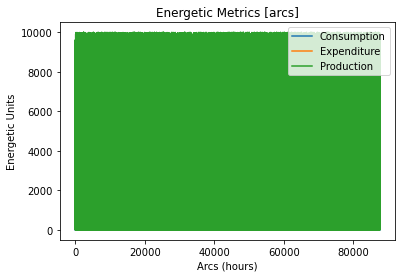

In [781]:

    #######################################################################################
    # Energetic Metrics
    #######################################################################################
    fig_title = 'Energetic Metrics'
    fig_resolution = 'arcs' # revolutions OR arcs
    fig_a, ax_a = plt.subplots()
    ax_a.set_title(f'{fig_title} [{fig_resolution}]')
    ax_a.set_xlabel('Arcs (hours)')
    ax_a.set_ylabel('Energetic Units')

    st = None #start
    sp = None #stop
    sk = None #skip


    ax_a.plot(X_arcs[st:sp:sk],
              me.consumption[st:sp:sk],
              label='Consumption')

    ax_a.plot(X_arcs[st:sp:sk],
              me.expenditure[st:sp:sk],
              label='Expenditure')

    ax_a.plot(X_arcs[st:sp:sk],
              me.production[st:sp:sk],
              label='Production')


    ax_a.legend()


    pdf_path, csv_path = pdir.generate_save_directories(fig_title, f'{sp} {fig_resolution}')
    fig_a.savefig(pdf_path)

    csv_headers = X_arcs[st:sp:sk]
    csv_values = [
        me.consumption[st:sp:sk],
        me.expenditure[st:sp:sk],
        me.production[st:sp:sk]
    ]

    with open(csv_path, 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(csv_headers)
        writer.writerows(csv_values)


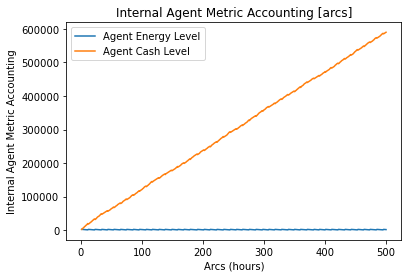

In [782]:

    #######################################################################################
    # Internal Agent Metric Accounting FIRST 500
    #######################################################################################
    fig_title = 'Internal Agent Metric Accounting'
    fig_resolution = 'arcs' # revolutions OR arcs
    fig_a, ax_a = plt.subplots()
    ax_a.set_title(f'{fig_title} [{fig_resolution}]')
    ax_a.set_xlabel('Arcs (hours)')
    ax_a.set_ylabel('Internal Agent Metric Accounting')

    st = None #start
    sp = 500 #stop
    sk = None #skip


    ax_a.plot(X_arcs[st:sp:sk],
              me.energy_level[st:sp:sk],
              label='Agent Energy Level')

    ax_a.plot(X_arcs[st:sp:sk],
              me.cash_level[st:sp:sk],
              label='Agent Cash Level')


    ax_a.legend()


    pdf_path, csv_path = pdir.generate_save_directories(fig_title, f'{sp} {fig_resolution}')
    fig_a.savefig(pdf_path)

    csv_headers = X_arcs[st:sp:sk]
    csv_values = [
        me.energy_level[st:sp:sk],
        me.cash_level[st:sp:sk]
    ]

    with open(csv_path, 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(csv_headers)
        writer.writerows(csv_values)


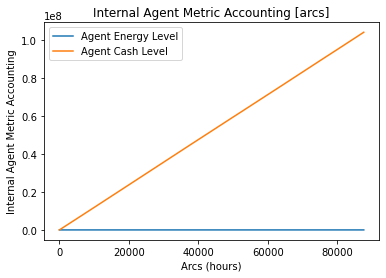

In [783]:

    #######################################################################################
    # Internal Agent Metric Accounting
    #######################################################################################
    fig_title = 'Internal Agent Metric Accounting'
    fig_resolution = 'arcs' # revolutions OR arcs
    fig_a, ax_a = plt.subplots()
    ax_a.set_title(f'{fig_title} [{fig_resolution}]')
    ax_a.set_xlabel('Arcs (hours)')
    ax_a.set_ylabel('Internal Agent Metric Accounting')

    st = None #start
    sp = None #stop
    sk = None #skip


    ax_a.plot(X_arcs[st:sp:sk],
              me.energy_level[st:sp:sk],
              label='Agent Energy Level')

    ax_a.plot(X_arcs[st:sp:sk],
              me.cash_level[st:sp:sk],
              label='Agent Cash Level')


    ax_a.legend()


    pdf_path, csv_path = pdir.generate_save_directories(fig_title, f'{sp} {fig_resolution}')
    fig_a.savefig(pdf_path)

    csv_headers = X_arcs[st:sp:sk]
    csv_values = [
        me.energy_level[st:sp:sk],
        me.cash_level[st:sp:sk]
    ]

    with open(csv_path, 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(csv_headers)
        writer.writerows(csv_values)


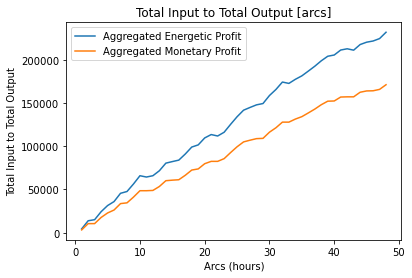

In [784]:

    #######################################################################################
    # Total Input to Total Output FIRST 48
    #######################################################################################
    fig_title = 'Total Input to Total Output'
    fig_resolution = 'arcs' # revolutions OR arcs
    fig_a, ax_a = plt.subplots()
    ax_a.set_title(f'{fig_title} [{fig_resolution}]')
    ax_a.set_xlabel('Arcs (hours)')
    ax_a.set_ylabel('Total Input to Total Output')

    st = None #start
    sp = 48 #stop
    sk = None #skip


    agg_energetic_profit    = list()
    agg_monetary_profit     = list()

    for i in range(len(X_arcs)):

        # energetic output to input difference
        agg_energetic_profit.append(me.agg_production[i] - me.agg_consumption[i])

        # monetary output to input difference
        agg_monetary_profit.append((m2e*me.agg_production[i]) - me.agg_earnings[i])


    # there is a gap where extra money is charged for a product
    # by the company - but there is also a gap where extra output is
    # given to the boss because of this - so they get two hits.
    # 1. by taking the worker's work
    # 2. by selling it for even more than what was already made off it.

    ax_a.plot(X_arcs[st:sp:sk],
              agg_energetic_profit[st:sp:sk],
              label='Aggregated Energetic Profit')

    ax_a.plot(X_arcs[st:sp:sk],
              agg_monetary_profit[st:sp:sk],
              label='Aggregated Monetary Profit')


    ax_a.legend()


    pdf_path, csv_path = pdir.generate_save_directories(fig_title, f'{sp} {fig_resolution}')
    fig_a.savefig(pdf_path)

    csv_headers = X_arcs[st:sp:sk]
    csv_values = [
        agg_energetic_profit[st:sp:sk],
        agg_monetary_profit[st:sp:sk]
    ]

    with open(csv_path, 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(csv_headers)
        writer.writerows(csv_values)


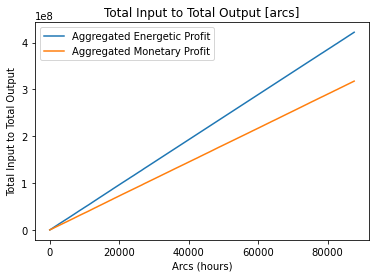

In [785]:

    #######################################################################################
    # Total Input to Total Output
    #######################################################################################
    fig_title = 'Total Input to Total Output'
    fig_resolution = 'arcs' # revolutions OR arcs
    fig_a, ax_a = plt.subplots()
    ax_a.set_title(f'{fig_title} [{fig_resolution}]')
    ax_a.set_xlabel('Arcs (hours)')
    ax_a.set_ylabel('Total Input to Total Output')

    st = None #start
    sp = None #stop
    sk = None #skip


    agg_energetic_profit    = list()
    agg_monetary_profit     = list()

    for i in range(len(X_arcs)):

        # energetic output to input difference
        agg_energetic_profit.append(me.agg_production[i] - me.agg_consumption[i])

        # monetary output to input difference
        agg_monetary_profit.append((m2e*me.agg_production[i]) - me.agg_earnings[i])


    # there is a gap where extra money is charged for a product
    # by the company - but there is also a gap where extra output is
    # given to the boss because of this - so they get two hits.
    # 1. by taking the worker's work
    # 2. by selling it for even more than what was already made off it.

    ax_a.plot(X_arcs[st:sp:sk],
              agg_energetic_profit[st:sp:sk],
              label='Aggregated Energetic Profit')

    ax_a.plot(X_arcs[st:sp:sk],
              agg_monetary_profit[st:sp:sk],
              label='Aggregated Monetary Profit')


    ax_a.legend()


    pdf_path, csv_path = pdir.generate_save_directories(fig_title, f'{sp} {fig_resolution}')
    fig_a.savefig(pdf_path)

    csv_headers = X_arcs[st:sp:sk]
    csv_values = [
        agg_energetic_profit[st:sp:sk],
        agg_monetary_profit[st:sp:sk]
    ]

    with open(csv_path, 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(csv_headers)
        writer.writerows(csv_values)


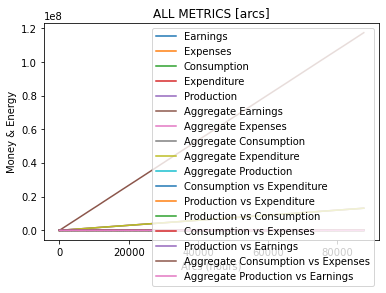

In [786]:

        #######################################################################################
        # ALL METRICS [NOT REALLY FOR GRAPHICAL SHOW]
        #######################################################################################
        fig_title = 'ALL METRICS'
        fig_resolution = 'arcs' # revolutions OR arcs
        fig_a, ax_a = plt.subplots()
        ax_a.set_title(f'{fig_title} [{fig_resolution}]')
        ax_a.set_xlabel('Arcs (hours)')
        ax_a.set_ylabel('Money & Energy')

        st = None #start
        sp = None #stop
        sk = None #skip

        ax_a.plot(X_arcs[st:sp:sk],
                  me.earnings[st:sp:sk],
                  label='Earnings')

        ax_a.plot(X_arcs[st:sp:sk],
                  me.expenses[st:sp:sk],
                  label='Expenses')

        ax_a.plot(X_arcs[st:sp:sk],
                  me.consumption[st:sp:sk],
                  label='Consumption')

        ax_a.plot(X_arcs[st:sp:sk],
                  me.expenditure[st:sp:sk],
                  label='Expenditure')

        ax_a.plot(X_arcs[st:sp:sk],
                  me.production[st:sp:sk],
                  label='Production')



        ax_a.plot(X_arcs[st:sp:sk],
                  me.agg_earnings[st:sp:sk],
                  label='Aggregate Earnings')

        ax_a.plot(X_arcs[st:sp:sk],
                  me.agg_expenses[st:sp:sk],
                  label='Aggregate Expenses')

        ax_a.plot(X_arcs[st:sp:sk],
                  me.agg_consumption[st:sp:sk],
                  label='Aggregate Consumption')

        ax_a.plot(X_arcs[st:sp:sk],
                  me.agg_expenditure[st:sp:sk],
                  label='Aggregate Expenditure')

        ax_a.plot(X_arcs[st:sp:sk],
                  me.production[st:sp:sk],
                  label='Aggregate Production')



        ax_a.plot(X_arcs[st:sp:sk],
                  me.consumption_vs_expenditure[st:sp:sk],
                  label='Consumption vs Expenditure')

        ax_a.plot(X_arcs[st:sp:sk],
                  me.production_vs_expenditure[st:sp:sk],
                  label='Production vs Expenditure')

        ax_a.plot(X_arcs[st:sp:sk],
                  me.production_vs_consumption[st:sp:sk],
                  label='Production vs Consumption')



        ax_a.plot(X_arcs[st:sp:sk],
                  me.consumption_vs_expenses[st:sp:sk],
                  label='Consumption vs Expenses')

        ax_a.plot(X_arcs[st:sp:sk],
                  me.production_vs_earnings[st:sp:sk],
                  label='Production vs Earnings')

        ax_a.plot(X_arcs[st:sp:sk],
                  me.agg_consumption_vs_expenses[st:sp:sk],
                  label='Aggregate Consumption vs Expenses')

        ax_a.plot(X_arcs[st:sp:sk],
                  me.agg_production_vs_earnings[st:sp:sk],
                  label='Aggregate Production vs Earnings')


        ax_a.legend()


        pdf_path, csv_path = pdir.generate_save_directories(fig_title, fig_resolution)
        fig_a.savefig(pdf_path)

        csv_headers = X_arcs[st:sp:sk]

        csv_values = [
            me.earnings[st:sp:sk],
            me.expenses[st:sp:sk],
            me.consumption[st:sp:sk],
            me.expenditure[st:sp:sk],
            me.production[st:sp:sk],

            me.agg_earnings[st:sp:sk],
            me.agg_expenses[st:sp:sk],
            me.agg_consumption[st:sp:sk],
            me.agg_expenditure[st:sp:sk],
            me.agg_production[st:sp:sk],

            me.consumption_vs_expenditure[st:sp:sk],
            me.production_vs_expenditure[st:sp:sk],
            me.production_vs_consumption[st:sp:sk],

            me.consumption_vs_expenses[st:sp:sk],
            me.production_vs_earnings[st:sp:sk],
            me.agg_consumption_vs_expenses[st:sp:sk],
            me.agg_production_vs_earnings[st:sp:sk]
        ]
        with open(csv_path, 'w', newline='') as csv_file:
            writer = csv.writer(csv_file)
            writer.writerow(csv_headers)
            writer.writerows(csv_values)


In [ ]:

choice_mode = True

if choice_mode is True:

    game_loop(1)
    game_loop(2)
    game_loop(10)
    game_loop(100)
    game_loop(1000)
    game_loop(10000)

else:

    m2e_offset = 1

    m2e_list = [1,2,3,4,5,6,7,8,9,10,
                15,20,25,30,35,40,45,50,
                100,200,300,400,500,1000,10000]

    for i in range(len(m2e_list)):
        game_loop(i)


In [ ]:

# #######################################################################################
# # UNSPECIFIED
# #######################################################################################
# fig_title = 'UNSPECIFIED'
# fig_resolution = 'arcs' # revolutions OR arcs
# fig_a, ax_a = plt.subplots()
# ax_a.set_title(f'{fig_title} [{fig_resolution}]')
# ax_a.set_xlabel('Arcs (aka: hours)')
# ax_a.set_ylabel('Money & Energy')
#
# st = None #start
# sp = 100 #stop
# sk = None #skip
#
# ax_a.plot((X_arcs[st:sp:sk] if fig_resolution=='arcs' else X_revolutions),
#           me.earnings[st:sp:sk], label='earnings')
#
# ax_a.plot((X_arcs[st:sp:sk] if fig_resolution=='arcs' else X_revolutions),
#           me.expenses[st:sp:sk], label='expenses')
#
# ax_a.plot((X_arcs[st:sp:sk] if fig_resolution=='arcs' else X_revolutions),
#           me.consumption[st:sp:sk], label='consumption')
#
# ax_a.plot((X_arcs[st:sp:sk] if fig_resolution=='arcs' else X_revolutions),
#           me.expenditure[st:sp:sk], label='expenditure')
#
# ax_a.plot((X_arcs[st:sp:sk] if fig_resolution=='arcs' else X_revolutions),
#           me.production[st:sp:sk], label='production')
#
#
#
# # ax_a.plot((X_arcs[st:sp:sk] if fig_resolution=='arcs' else X_revolutions),
# #           me.agg_earnings[st:sp:sk], label='agg_earnings')
# #
# # ax_a.plot((X_arcs[st:sp:sk] if fig_resolution=='arcs' else X_revolutions),
# #           me.agg_expenses[st:sp:sk], label='agg_expenses')
# #
# # ax_a.plot((X_arcs[st:sp:sk] if fig_resolution=='arcs' else X_revolutions),
# #           me.agg_consumption[st:sp:sk], label='agg_consumption')
# #
# # ax_a.plot((X_arcs[st:sp:sk] if fig_resolution=='arcs' else X_revolutions),
# #           me.agg_expenditure[st:sp:sk], label='agg_expenditure')
# #
# # ax_a.plot((X_arcs[st:sp:sk] if fig_resolution=='arcs' else X_revolutions),
# #           me.agg_production[st:sp:sk], label='agg_production')
# #
# #
# #
# # ax_a.plot((X_arcs[st:sp:sk] if fig_resolution=='arcs' else X_revolutions),
# #           me.consumption_vs_expenditure[st:sp:sk], label='consumption_vs_expenditure')
# #
# # ax_a.plot((X_arcs[st:sp:sk] if fig_resolution=='arcs' else X_revolutions),
# #           me.production_vs_expenditure[st:sp:sk], label='production_vs_expenditure')
# #
# # ax_a.plot((X_arcs[st:sp:sk] if fig_resolution=='arcs' else X_revolutions),
# #           me.production_vs_consumption[st:sp:sk], label='production_vs_consumption')
# #
# #
# #
# # ax_a.plot((X_arcs[st:sp:sk] if fig_resolution=='arcs' else X_revolutions),
# #           me.consumption_vs_expenses[st:sp:sk], label='consumption_vs_expenses')
# #
# # ax_a.plot((X_arcs[st:sp:sk] if fig_resolution=='arcs' else X_revolutions),
# #           me.production_vs_earnings[st:sp:sk], label='production_vs_earnings')
# #
# # ax_a.plot((X_arcs[st:sp:sk] if fig_resolution=='arcs' else X_revolutions),
# #           me.agg_consumption_vs_expenses[st:sp:sk], label='agg_consumption_vs_expenses')
# #
# # ax_a.plot((X_arcs[st:sp:sk] if fig_resolution=='arcs' else X_revolutions),
# #           me.agg_production_vs_earnings[st:sp:sk], label='agg_production_vs_earnings')
# #
#
# ax_a.legend()
# fig_a.savefig(f'Graphs/@{m2e}/{fig_title} [{fig_resolution}].pdf')
# # fig_a.show()


In [763]:
# [x+170 for x in list1]
# map(lambda x: x+170, list1)

In [764]:
# NON-TUPLE ZIP
#1
# list1 = ['f', 'o', 'o']
# list2 = ['hello', 'world']
# result = [None]*(len(list1)+len(list2))
# result[::2] = list1
# result[1::2] = list2
#
#2
# import itertools
# print [x for x in itertools.chain.from_iterable(itertools.izip_longest(list1,list2)) if x]
#
#3
# list(np.concatenate(zip(a,b)))



# X = [1,2,3,4,5,6,7,8,9,10,11]
# Y = [3,6,9,12,15,18,21,24,27,30,33]
#
# fig, ax = plt.subplots()
# ax.plot(X, Y, label='Dataset Label')
#
# ax.set_xlabel('X Axis Label')
# ax.set_ylabel('Y Axis Label')
# ax.set_title("Me vs World Simulation")
# ax.legend()
#
# fig.savefig("figure.pdf")
# fig.show()

